<a href="https://colab.research.google.com/github/JorgeLGomes/PROJETA/blob/main/HST_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#@title Texto de título padrão
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output
import scipy as sci
import datetime
import json
import requests
import csv
from google.colab import files

In [36]:
#@title Definição das Funções { run: "auto" }
def set_variavel(model_var):
  global yfig_title
  if model_var == 'slp':
    yfig_title=""
  elif model_var == 'ts':
    yfig_title=""
  elif model_var == 'ttprec':
    yfig_title=""
  elif model_var == 'tsh':
    yfig_title=""
  elif model_var == 'ocis':
    yfig_title=""
  elif model_var == 'olis':
    yfig_title=""
  elif model_var == 'qs':
    yfig_title=""
  elif model_var == 'rh':
    yfig_title=""
  elif model_var == 'u10':
    yfig_title=""
  elif model_var == 'v10':
    yfig_title=""
  elif model_var == 'cfracl':
    yfig_title=""
  elif model_var == 'cfracm':
    yfig_title=""
  elif model_var == 'cfrach':
    yfig_title=""
  elif model_var == 'ufirstlev':
    yfig_title=""
  elif model_var == 'vfirstlev':
    yfig_title=""

def Write_CSV():
    df.to_csv(file_out+'.csv',sep=';',index=False)
    files.download(file_out+'.csv')
    return

def Gera_URL():
    global url,file_out
    url="http://ftp1.cptec.inpe.br/pesquisa/grpeta/users/jorge/testes/Eta40km"
    url=url+"/hst.json/"+Run_date+"/hst_"+Ponto+".json"
    file_out="hst_"+Ponto
    return
def Get_Data():
    global df
    request = requests.get(url)
    request_json = request.json()
    df = pd.json_normalize(request_json)
    return 
def on_button_clicked_save_fig(b):
    plt.savefig(file_out+'.png')
    files.download(file_out+'.png')
    return
def Save_Fig():
    button = widgets.Button(description="Save Fig")
    display(button)
    button.on_click(on_button_clicked_save_fig)
    return

def Plota(Salva_Grafico):
#    %matplotlib notebook
    %matplotlib inline
    Gera_URL()
    #%config InlineBackend.figure_format ='retina'
    df.plot(x ='fct', y=Variavel, kind='line')
    plt.title(file_out, size = 10)
    plt.xlabel("Data")
    plt.ylabel(yfig_title)
    if Salva_Grafico:
      plt.savefig(file_out+'.png')
      files.download(file_out+'.png')
    plt.show()
    return

http://ftp1.cptec.inpe.br/pesquisa/grpeta/users/jorge/testes/Eta40km/hst.json/2023051100/hst_CPA.json


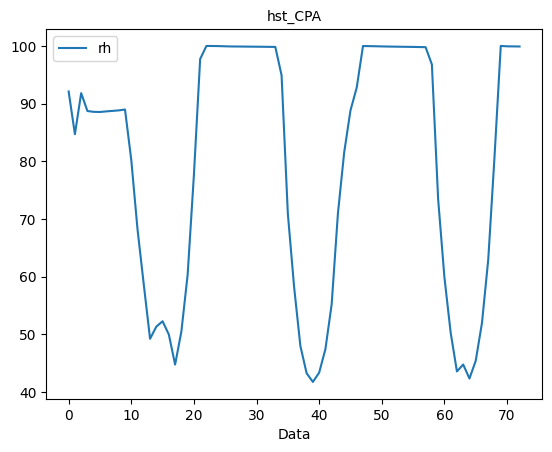

In [37]:
#@title Texto de título padrão { run: "auto", form-width: "50%" }
Salva_CSV = False #@param {type:"boolean"}
Plota_Grafico = True #@param {type:"boolean"}
Salva_Grafico = False #@param {type:"boolean"}
Run_date = "2023051100" #@param {type:"string"}
Ponto = "CPA" #@param ["ASN","ARA","BEH","BVT","BRA","BAS","BGO","BEL","CPA","CUI","CAR","CAY","CUR","CPG","FEN","FTZ","FLO","GEO","GOI","JPS","LPZ","LIM","MCO","MNS","MAC","MON","NAT","POA","PAL","PAR","PVH","PSF","RIO","REC","RBR","SAP","SLV","SLU","SAN","TER","VTO","SJC","ITB","CPN","CTR","FOZ","COT","DIA","TIE","ILH","NEP","PSA","SNT","SFS","PRG","RGR","BAC","IMP","CAX","BAL","QTO","LEN","QTA","G01","G02","G03","G04","G05","G06","G07","G08","G09","G10","G11","G12","G13","G14","G15","G16","G17","G18","G19","G20","G21","G22","G23","G24","G25","MDZ","AND","CAN","RCL","TTI","UBA","VOT","TMD","SSB","IGR","REG","GUR","SOL","P01","P02","JZF","VIC","MCL","GVL","OUP","SJR","SLO","ARX","CIT","CMP","MCE","ITT","RBP","IVA","RVD","ITU","ARG","PRR","ACO","RON","CAI","PLO","TEM","PMO","BLM","GJM","VLN","RBJ","JPR","FNS","CLN","STR","COR","CHA","CER","SDE","PAM","SAL","MES","ROB","TRI","YAQ","PMA","CRU"]
Variavel = "rh" #@param ["slp","ts","ttprec","tsh","ocis","olis","qs","rh","u10","v10","cfracl","cfracm","cfrach","ufirstlev","vfirstlev"]
set_variavel(Variavel)

Gera_URL()
print(url)
Get_Data()
if Plota_Grafico:
  Plota(Salva_Grafico)
if Salva_CSV:
  Write_CSV()
